In [2]:
import os
import pandas as pd

dfs = []
for i in range(5):

    df = pd.read_csv(os.path.join("data", f"graphs_rta_{i+1}.csv"))
    dfs.append(df)

df_agg = pd.concat(dfs)

grouped = df_agg.groupby('V').agg({
    'ar_time_taken': 'mean',
    'mh_time_taken': 'mean'
}).reset_index()

In [5]:
grouped = grouped.iloc[1:]
grouped.head()

,V,ar_time_taken,mh_time_taken
1,100,0.000076,0.000093
2,200,0.000293,0.000303
3,300,0.000580,0.000577
4,400,0.001013,0.000973
5,500,0.001624,0.001509


In [14]:
import matplotlib.pyplot as plt

def vis_runtime(df, title):

    plt.figure(figsize=(10, 6))
    plt.plot(df['V'], df['ar_time_taken'], label='ar_time_taken', marker='o')
    plt.plot(df['V'], df['mh_time_taken'], label='mh_time_taken', marker='o')
    plt.xlabel('V')
    plt.ylabel('Time Taken')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


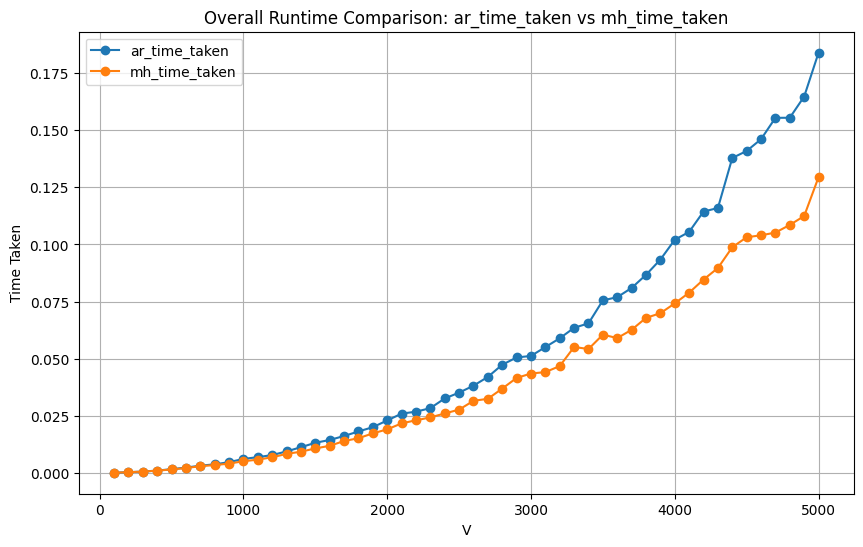

In [15]:
vis_runtime(
    df=grouped, 
    title="Overall Runtime Comparison: ar_time_taken vs mh_time_taken")

In [10]:
min_zone = grouped[grouped["V"] <= 1000]
max_zone = grouped[grouped["V"] >= 4000]

No significant difference on runtime when the graph size is minimal.

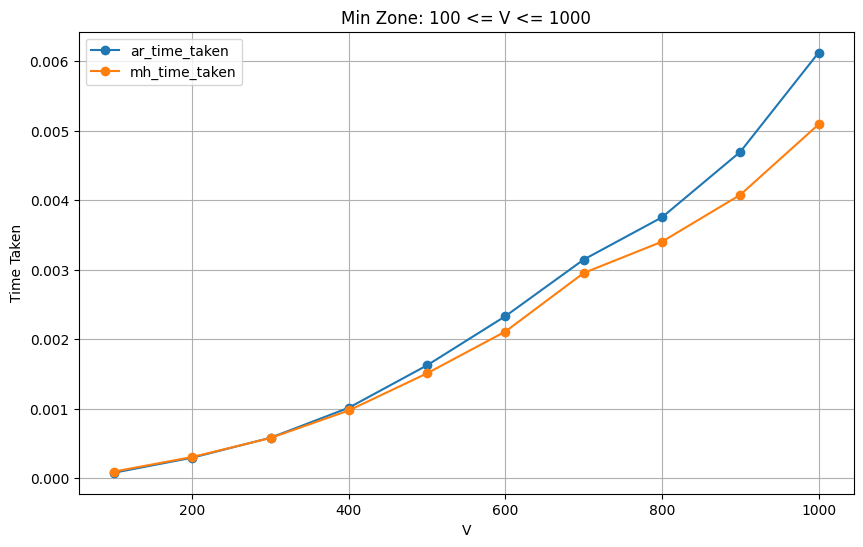

In [16]:
vis_runtime(
    df=min_zone,
    title="Min Zone: 100 <= V <= 1000")

The gap proportionately increases as graph size V increases, eventually using a minimizing heap results in a lower runtime.

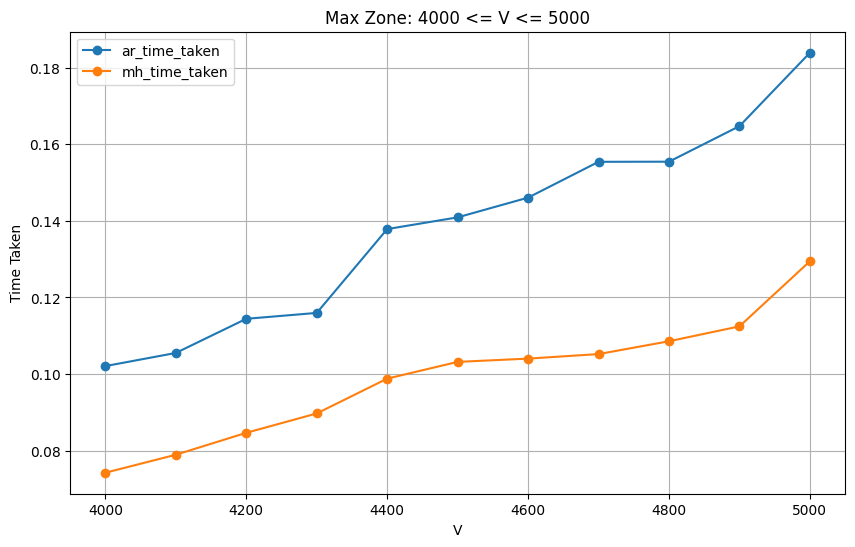

In [17]:
vis_runtime(
    df=max_zone,
    title="Max Zone: 4000 <= V <= 5000")